In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import inspect

import pandas as pd
import numpy as np

from cls2 import occur, plotting
from cls2.occur import *
from cls2.io import *

In [2]:
objects = pd.read_csv('legacy_tables/planet_list.csv')
trends = pd.read_csv('legacy_tables/trend_list.csv')

objects_real   = objects.query('status != "N" and status != "A" and status != "R"').reset_index(drop=True)
objects_good   = objects_real.query('mass != "nan"').reset_index(drop=True)
planets_s      = objects_good.query('(status == "S" or status == "SS") and mass > 10').reset_index(drop=True)
planets        = objects_good.query('status != "S" and status != "SS"').reset_index(drop=True)
planets_old    = planets.query('status == "K"').reset_index(drop=True)
planets_new    = planets.query('status == "C" or status == "J"').reset_index(drop=True)


samples_all = pd.read_csv('legacy_tables/samples_all_joker.csv').sample(500).reset_index(drop=True)

good_cols = [col for col in samples_all.columns if '_S' in col or '_M' in col]
for col in good_cols:
    # remove 114762 b/c found to be face-on binary Keifer et al. (2019)
    if '114762' in col:
        continue

    if '_M' in col:
        samples_all[col] *= 317.8

        
allbins = lngrid(3e-4, 1000., 30., 6000, 11, 1) 
        
samples_all = samples_all[good_cols]
samples_all

,104067_M1,104067_S1,10697_M1,10697_S1,107148_M1,107148_S1,107148_M2,107148_S2,108874_M1,108874_S1,...,83443_M1,83443_S1,183263_M1,183263_S1,183263_M2,183263_S2,gl876_M1,gl876_S1,gl876_M2,gl876_S2
0,62.350750,4.436741,1994.940993,0.693261,61.133599,10.333490,20.585441,70.312320,422.862075,0.827934,...,118.721178,510.150118,1166.641068,0.851894,2500.797833,0.053319,654.506914,0.327231,216.010210,0.835056
1,70.726193,4.635919,1952.398174,0.720391,72.821608,10.201694,19.651975,69.383206,423.542435,0.843287,...,135.919331,470.646733,1189.183573,0.735110,2585.736334,0.045349,695.665201,0.334158,228.622019,0.852749
2,61.084102,4.670560,1999.372027,0.714627,65.344580,10.282817,18.346719,69.912242,429.179452,0.932760,...,127.778343,409.612743,1147.788302,0.686304,2420.152531,0.042733,694.229878,0.263257,229.563383,0.671860
3,59.530364,4.224117,2121.143478,0.743595,67.927272,10.936785,20.155574,74.379131,405.350669,1.029183,...,135.662071,536.472078,1198.592351,0.723796,2572.731114,0.045034,662.658448,0.290718,222.050263,0.741920
4,63.135219,4.349629,2032.620783,0.696570,72.091379,11.581656,23.884921,78.797912,430.567868,0.742644,...,130.092977,458.208564,1168.709734,0.773907,2537.337660,0.048225,683.344716,0.278873,226.993849,0.711636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,57.341145,4.313368,1999.451480,0.655758,61.814368,9.659194,21.123989,65.702645,397.266653,0.978524,...,119.900150,512.056214,1151.438161,0.744601,2488.156673,0.046029,677.566388,0.281727,225.052199,0.718971
496,68.405200,4.404233,2006.810959,0.696274,66.866270,10.547675,23.821655,71.743434,421.018457,0.839991,...,129.023223,481.363747,1168.450669,0.972764,2489.170655,0.060734,634.023400,0.346359,210.442029,0.883874
497,58.473153,5.070499,2031.195761,0.630112,64.197178,9.788260,20.739560,66.622652,406.668924,0.999093,...,133.225742,524.457399,1176.829701,0.733196,2522.673861,0.045480,678.919146,0.287557,225.787274,0.733818
498,65.965797,4.606732,1987.603873,0.737729,59.529329,8.987796,18.847195,61.128374,429.686246,0.841076,...,129.179508,515.283530,1234.430900,0.812739,2611.717786,0.050974,657.883808,0.295969,217.431932,0.755285


In [3]:
recoveries_all = pd.read_csv('recoveries_all_earth.csv')
completey_all  = Completeness(recoveries_all, xcol='inj_insol')

In [4]:
hierarchical_one = Insol(samples_all, completey_all, bins=allbins)

In [5]:
hierarchical_one.max_like()

0.0003000000000000001 0.0011751958024123332 30.000000000000004 5999.999999999995 1
0.0011751958024123332 0.004603617246691891 30.000000000000004 5999.999999999995 4
0.004603617246691891 0.018033838880751118 30.000000000000004 5999.999999999995 9
0.018033838880751118 0.07064430584679679 30.000000000000004 5999.999999999995 17
0.07064430584679679 0.27673630565162866 30.000000000000004 5999.999999999995 21
0.27673630565162866 1.0840644825896355 30.000000000000004 5999.999999999995 30
1.0840644825896355 4.246626764945453 30.000000000000004 5999.999999999995 14
4.246626764945453 16.635393161919215 30.000000000000004 5999.999999999995 14
16.635393161919215 65.16614738455435 30.000000000000004 5999.999999999995 6
65.16614738455435 255.27660955237207 30.000000000000004 5999.999999999995 3
255.27660955237207 999.9999999999998 30.000000000000004 5999.999999999995 12


In [6]:
hierarchical_one.sample(parallel=False, gp=False)

100%|██████████| 1000/1000 [47:01<00:00,  2.82s/it]


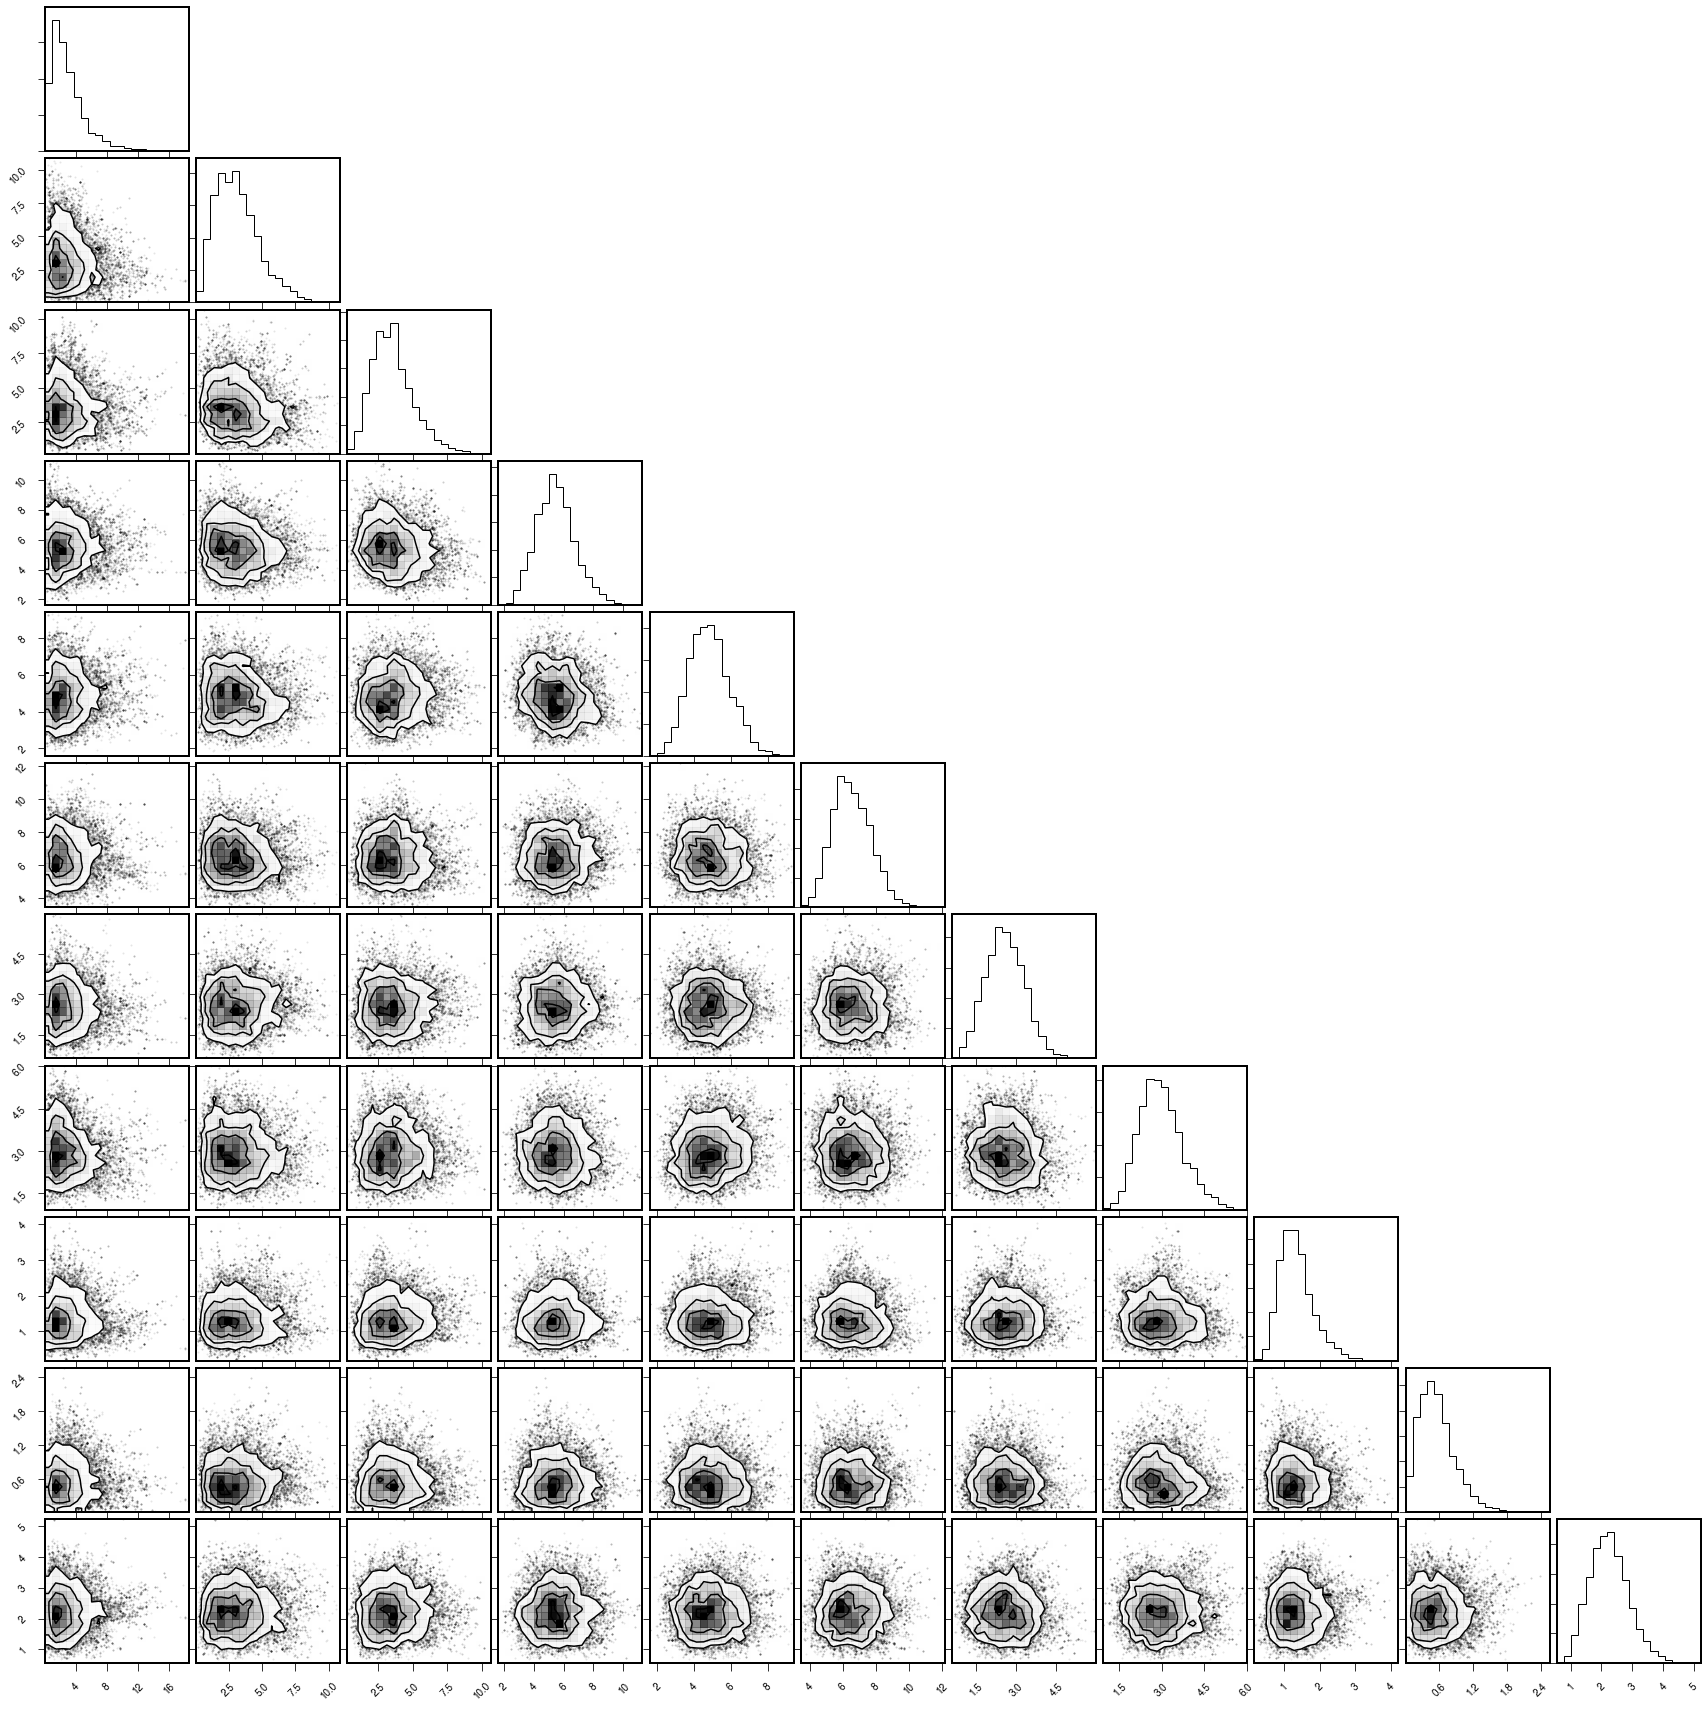

In [7]:
fig = corner.corner(hierarchical_one.chains[10000:]*hierarchical_one.bin_areas[0][0]*(100/719))
fig.savefig('plots/corner_11x1_insol.pdf')

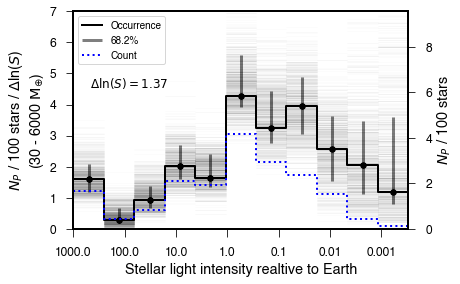

In [12]:
plotting.insol_hist(planets, allbins, hierarchical_one,
                     outname='plots/hist_11x1_insol.pdf', chainfile='insol_chains.csv')